# Data Science Project - Churn Prediction

## Prasetyo Wisnu N

## Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py
import scipy.stats as stats

In [2]:
data = pd.read_csv("Diabetes Dataset.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Deskripsi Feature dari dataset
* Pregnancies : Number of times Pregnant
* Glucose : Plasma glucose concentration
* BloodPressure : Diastolic blood pressure (mm Hg)
* SkinThickness : Triceps skin fold thickness (mm)
* Insulin : 2-Hour serum insulin (mu U/ml)
* BMI : Body Mass Index
* DiabetesPedigreeFunction : Diabetes pedigree function
* Age : Age in years
* Outcome : Whether the lady is diabetic or not, 0 represents the person is not diabetic and 1 represents that the person is diabetic.


# EDA

## Understanding the Dataset

In [19]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [23]:
data.shape

(768, 9)

In [24]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Dari data diatas, dapat terlihat terdapat beberapa feature (column) yang nilai minimalnya sangat tidak mungkin bernilai 0. Feature tersebut diantaranya, yaitu:

*   Glucose
*   BloodPressure
*   SkinThickness
*   Insulin
*   BMI



## Data Cleaning

### Drop Duplicates

In [26]:
data = data.drop_duplicates()

### Checking Missing Values

In [27]:
data['Glucose'] = data['Glucose'].replace(0, np.NaN)
data['BloodPressure'] = data['BloodPressure'].replace(0, np.NaN)
data['SkinThickness'] = data['SkinThickness'].replace(0, np.NaN)
data['Insulin'] = data['Insulin'].replace(0, np.NaN)
data['BMI'] = data['BMI'].replace(0, np.NaN)

In [28]:
import missingno as msno

<AxesSubplot: >

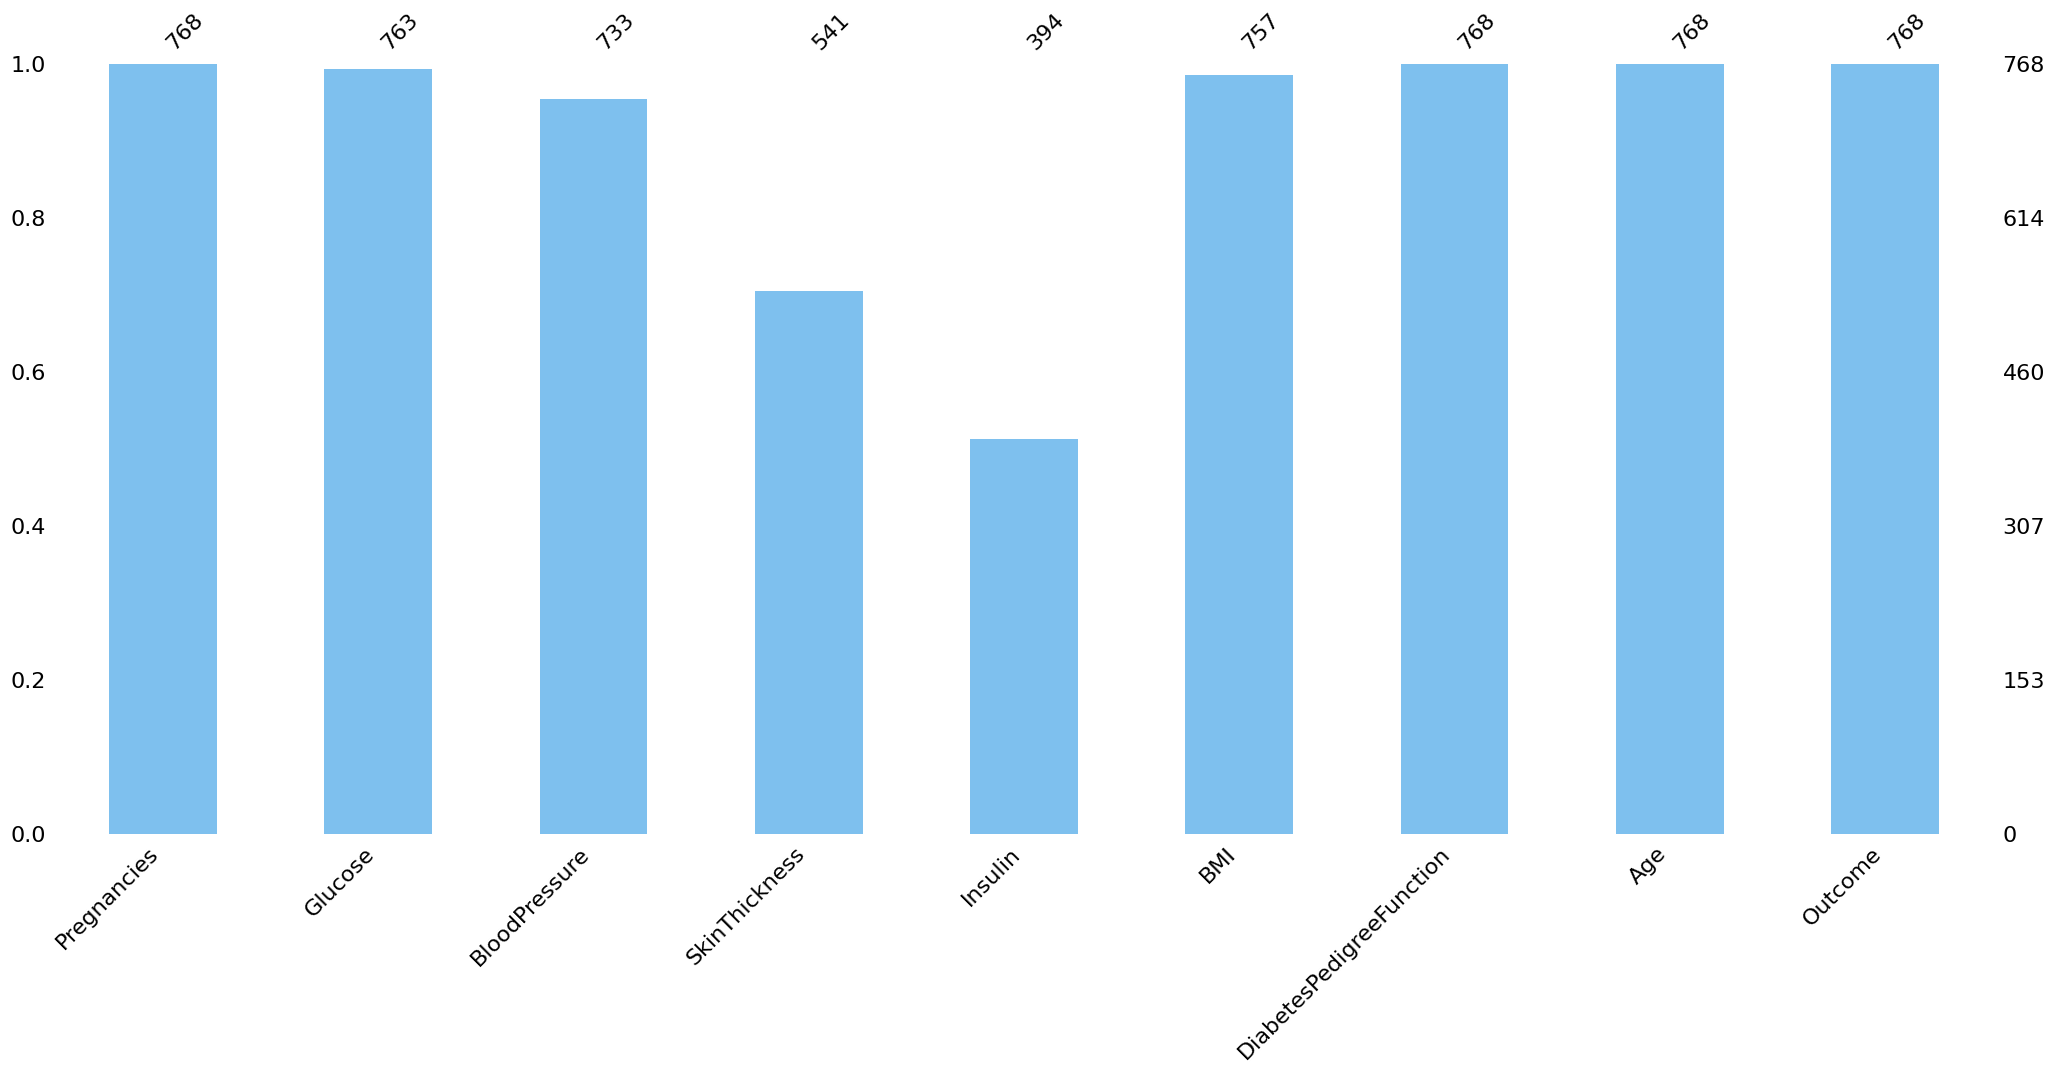

In [29]:
msno.bar(data, color='#7EC0EE')

In [30]:
print('Missing Values in Glucose:', data['Glucose'].isnull().sum())
print('Missing Values in BloodPressure:', data['BloodPressure'].isnull().sum())
print('Missing Values in SkinThickness:', data['SkinThickness'].isnull().sum())
print('Missing Values in Insulin:', data['Insulin'].isnull().sum())
print('Missing Values in BMI:', data['BMI'].isnull().sum())

Missing Values in Glucose: 5
Missing Values in BloodPressure: 35
Missing Values in SkinThickness: 227
Missing Values in Insulin: 374
Missing Values in BMI: 11


Dari Grafik diatas, dapat diketahui jumlah missing values pada 5 features. Feature *Insulin* yang paling banyak missing valuesnya disusul oleh Feature *SkinThickness*.
Selanjutnya kita akan mereplace missing values tersebut

### Replace Missing Values

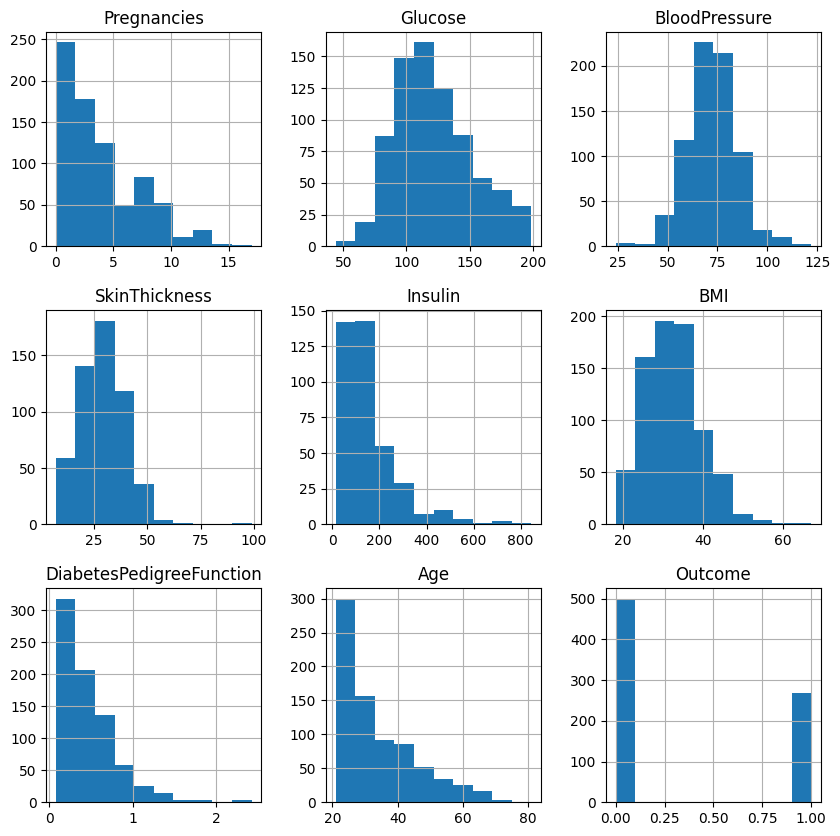

In [31]:
data.hist(figsize=(10,10))
plt.show()

Dari sebaran data,


*   **Glucose** dan **BloodPressure** memiliki distribusi normal, karena itu kita akan mengganti missing values dengan nilai mean by target
*   **SkinThickness**, **Insulin** dan **BMI** distribusi nya skewed ke kanan, karena itu kita akan mengganti missing values dengan nilai median by target



In [32]:
de_by_target = data.copy()

In [33]:
de_by_target_mean = de_by_target.groupby(['Outcome']).mean().round(2)
de_by_target_mean.iloc[: , 1:3]

,Glucose,BloodPressure
Outcome,,
0,110.64,70.88
1,142.32,75.32


In [34]:
de_by_target_median = de_by_target.groupby(['Outcome']).median().round(2)
de_by_target_median.iloc[: , 3:6]

,SkinThickness,Insulin,BMI
Outcome,,,
0,27.0,102.5,30.1
1,32.0,169.5,34.3


In [35]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 110.64
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 142.32
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70.88
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 75.32
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32.0
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [36]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


## Features Vs Target

In [37]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

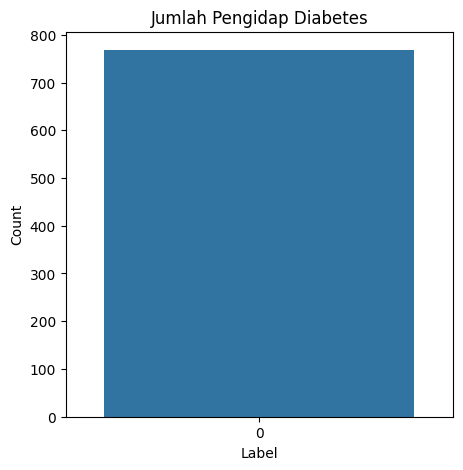

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(data['Outcome'])

plt.title('Jumlah Pengidap Diabetes')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


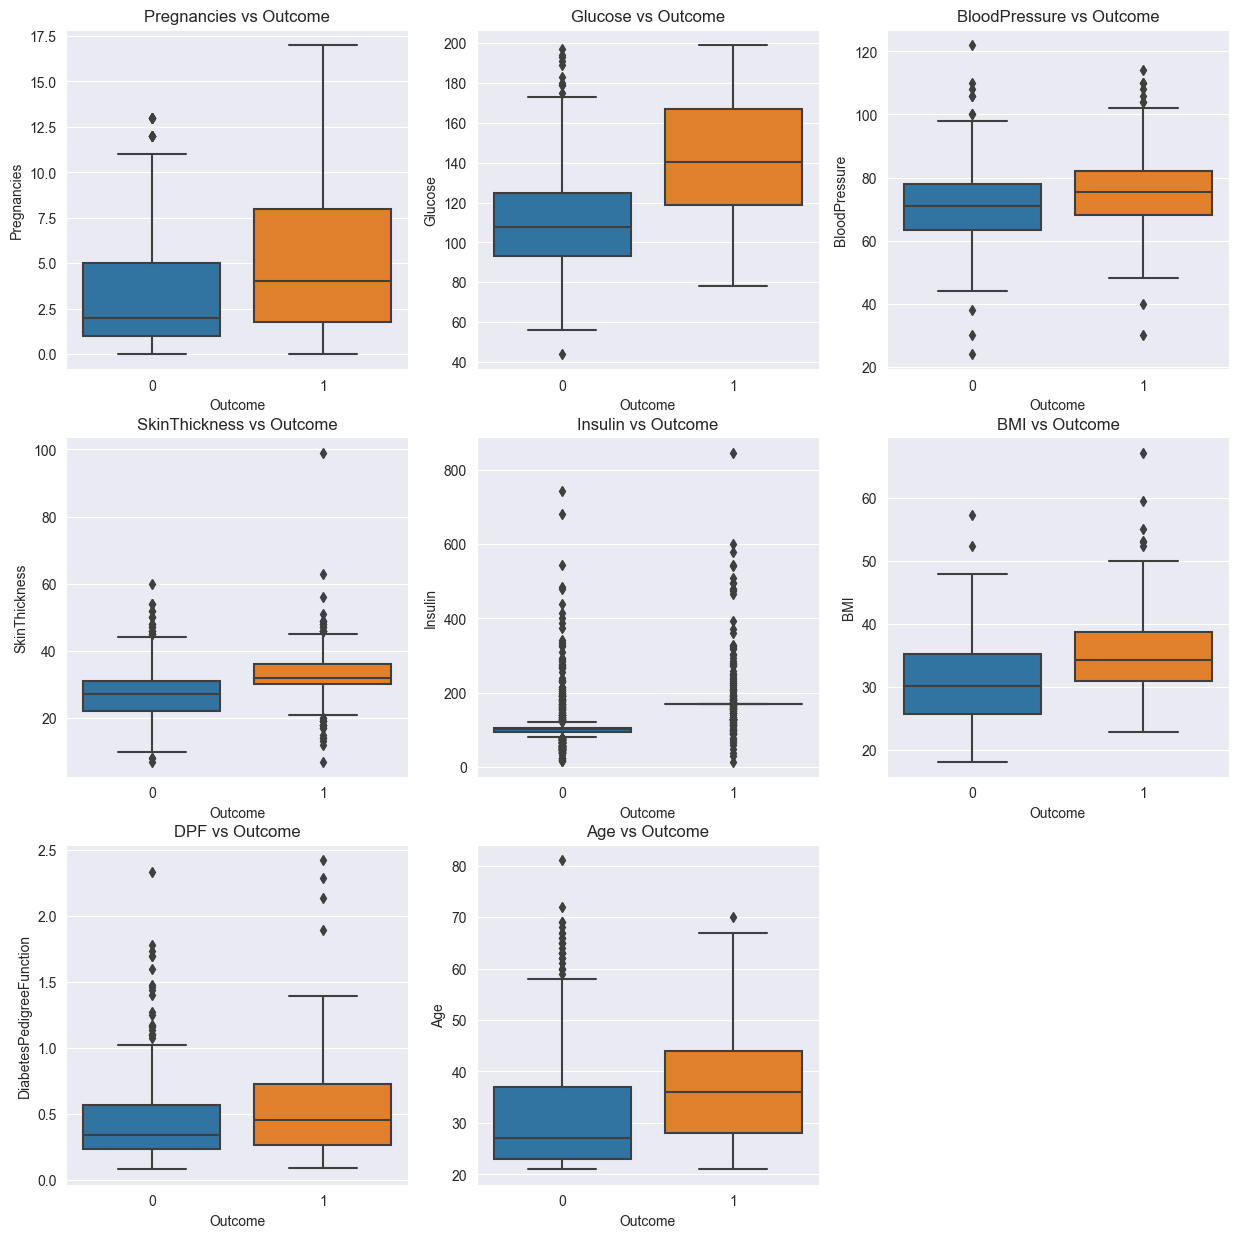

In [39]:
plt.figure(figsize=(15,15))
sns.set_style("darkgrid")
plt.subplot(3, 3, 1)
sns.boxplot(x = 'Outcome', y = 'Pregnancies', data=data)
plt.title('Pregnancies vs Outcome')
plt.subplot(3, 3, 2)
sns.boxplot(x = 'Outcome', y = 'Glucose', data=data)
plt.title('Glucose vs Outcome')
plt.subplot(3, 3, 3)
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data=data)
plt.title('BloodPressure vs Outcome')
plt.subplot(3, 3, 4)
sns.boxplot(x = 'Outcome', y = 'SkinThickness', data=data)
plt.title('SkinThickness vs Outcome')
plt.subplot(3, 3, 5)
sns.boxplot(x = 'Outcome', y = 'Insulin', data=data)
plt.title('Insulin vs Outcome')
plt.subplot(3, 3, 6)
sns.boxplot(x = 'Outcome', y = 'BMI', data=data)
plt.title('BMI vs Outcome')
plt.subplot(3, 3, 7)
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data=data)
plt.title('DPF vs Outcome')
plt.subplot(3, 3, 8)
sns.boxplot(x = 'Outcome', y = 'Age', data=data)
plt.title('Age vs Outcome')

plt.show()

Dari Boxplot Diagram diatas, dapat terlihat karateristik setiap feature dengan Target (Outcome)

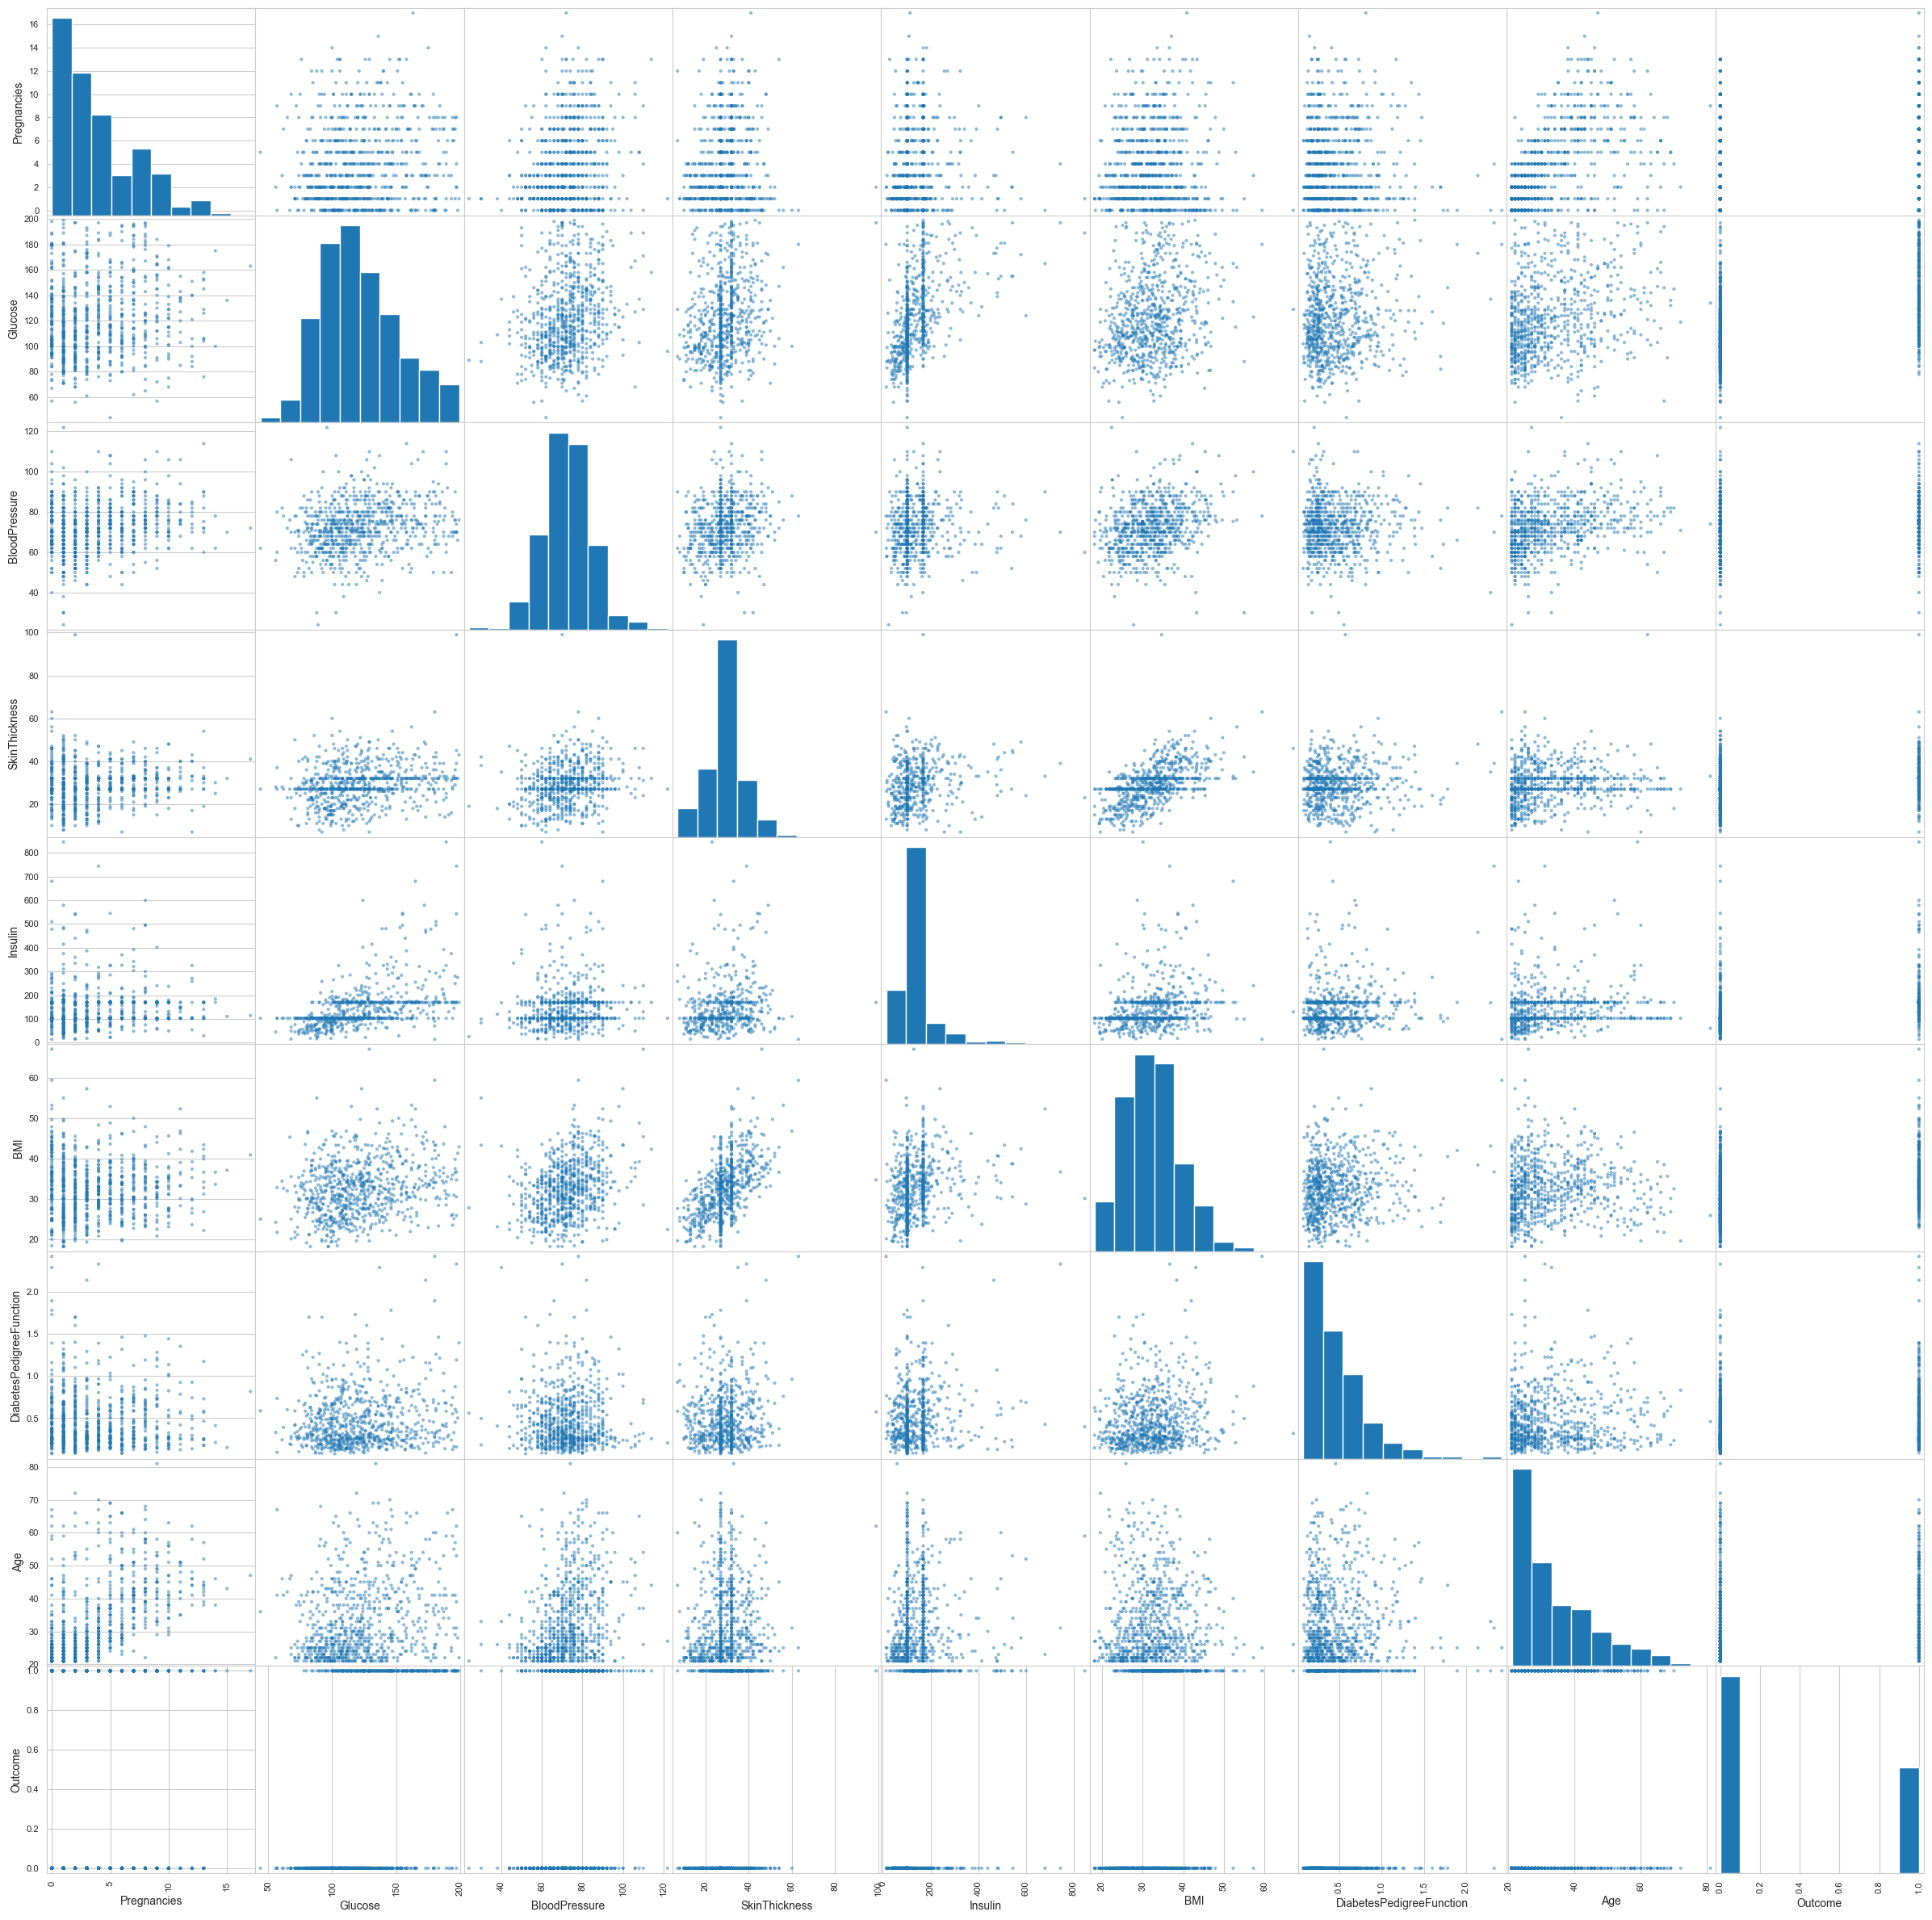

In [40]:
from pandas.plotting import scatter_matrix
sns.set_style("whitegrid")
scatter_matrix(data,figsize=(30,30))

plt.show()

Dari Scatter diagram diatas, dapat terlihat hubungan antar feature dan perilaku dari datanya

# Data Preparation

## Korelasi

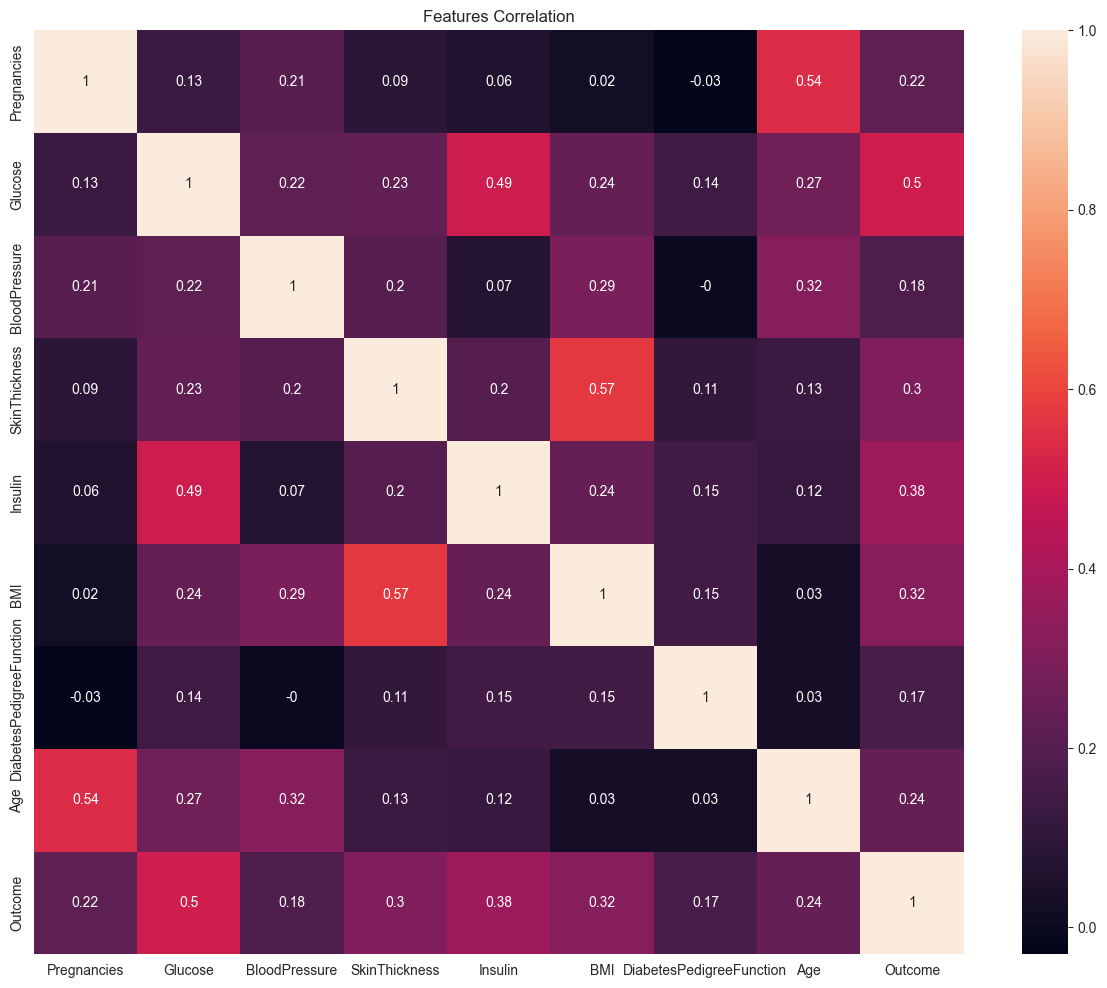

In [41]:
plt.figure(figsize=(15,12))
plot = sns.heatmap(data.corr().round(2), annot=True)
plt.title('Features Correlation')

plt.show()

Dari Korelasi Heatmap diatas dapat dilihat Feature **Glucose** (0.5), **Insulin** (0.38), **BMI** (0.32), **SkinThickness** (0.3), **Age** (0.24) dan **Pregnancies** (0.22) memiliki korelasi yang lebih baik terhadap **Outcome** dibandingkan feature **BloodPressure** (0.18) dan **DiabetesPedigreeFunction** (0.17).


## New Feature

### 1. Klasifikasi BMI

Klasifikasi Nasional
- Kurus tingkat berat  < 18,5
- Normal 18,5 - 25,0
- Gemuk tingkat ringan 25,1 - 27,0
- Gemuk tingkat berat > 27,0

In [42]:
NF_BMI = pd.Series(["Kurus", "Normal", "Gemuk 1", "Gemuk 2"], dtype = "category")
data["NF_BMI"] = NF_BMI
data.loc[data["BMI"] < 18.5, "NF_BMI"] = NF_BMI[0]
data.loc[(data["BMI"] > 18.4) & (data["BMI"] <= 25.0), "NF_BMI"] = NF_BMI[1]
data.loc[(data["BMI"] > 25.0) & (data["BMI"] <= 27.0), "NF_BMI"] = NF_BMI[2]
data.loc[data["BMI"] > 27.0, "NF_BMI"] = NF_BMI[3]

In [43]:
data['NF_BMI'].value_counts()

Gemuk 2    594
Normal     108
Gemuk 1     62
Kurus        4
Name: NF_BMI, dtype: int64

In [44]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NF_BMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Gemuk 2
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Gemuk 1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Gemuk 2
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Gemuk 2


### 2. Tingkat Insulin

Menurut Kementerian Kesehatan, kadar insulin orang normal berada direntang 60 - 200 mu U/ml

In [45]:
def kategori_insulin(row):
  if row['Insulin'] > 60.0 and row['Insulin'] < 200.0:
    return "Normal"
  else:
    return "Tidak Normal"

In [46]:
data = data.assign(NF_Insulin=data.apply(kategori_insulin, axis=1))

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NF_BMI,NF_Insulin
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Gemuk 2,Normal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Gemuk 1,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Gemuk 2,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Gemuk 2,Normal


In [47]:
data['NF_Insulin'].value_counts()

Normal          617
Tidak Normal    151
Name: NF_Insulin, dtype: int64

### 3. Klasifikasi Glucose

Menurut Kemenkes, terdapat 2 tingkat kadar gula darah seseorang, yaitu:
- Kadar Tidak Potensi : < 110 mg / dL
- Kadar Berpotensi : > 110 mg / dL

In [48]:
def kategori_glucose(row):
  if row['Glucose'] < 110.0:
    return "Tidak Potensi"
  else:
    return "Berpotensi"

In [49]:
data = data.assign(NF_Glucose=data.apply(kategori_glucose, axis=1))

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NF_BMI,NF_Insulin,NF_Glucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Gemuk 2,Normal,Berpotensi
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Gemuk 1,Normal,Tidak Potensi
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Normal,Berpotensi
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Gemuk 2,Normal,Tidak Potensi
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Gemuk 2,Normal,Berpotensi


In [50]:
data['NF_Glucose'].value_counts()

Berpotensi       459
Tidak Potensi    309
Name: NF_Glucose, dtype: int64

## Feature Engineering

### Label & One Hot Encoder

In [51]:
data_prep = data.copy()

In [52]:
#label encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
data_prep['NF_BMI'] = le.fit_transform(data_prep['NF_BMI'])
data_prep.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NF_BMI,NF_Insulin,NF_Glucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,Normal,Berpotensi
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,Normal,Tidak Potensi
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,3,Normal,Berpotensi
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,Normal,Tidak Potensi
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,Normal,Berpotensi


In [53]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
string_feat = ['NF_Insulin', 'NF_Glucose']
ohe = OneHotEncoder()
ohe.fit(data_prep[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(data_prep[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
data_prep = pd.concat([data_prep, data_ohe_res], axis=1)
data_prep = data_prep.drop(columns=string_feat)
data_prep.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NF_BMI,NF_Insulin_Normal,NF_Insulin_Tidak Normal,NF_Glucose_Berpotensi,NF_Glucose_Tidak Potensi
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,1.0,0.0,1.0,0.0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,1.0,0.0,0.0,1.0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,3,1.0,0.0,1.0,0.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,1.0,0.0,0.0,1.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,1.0,0.0,1.0,0.0


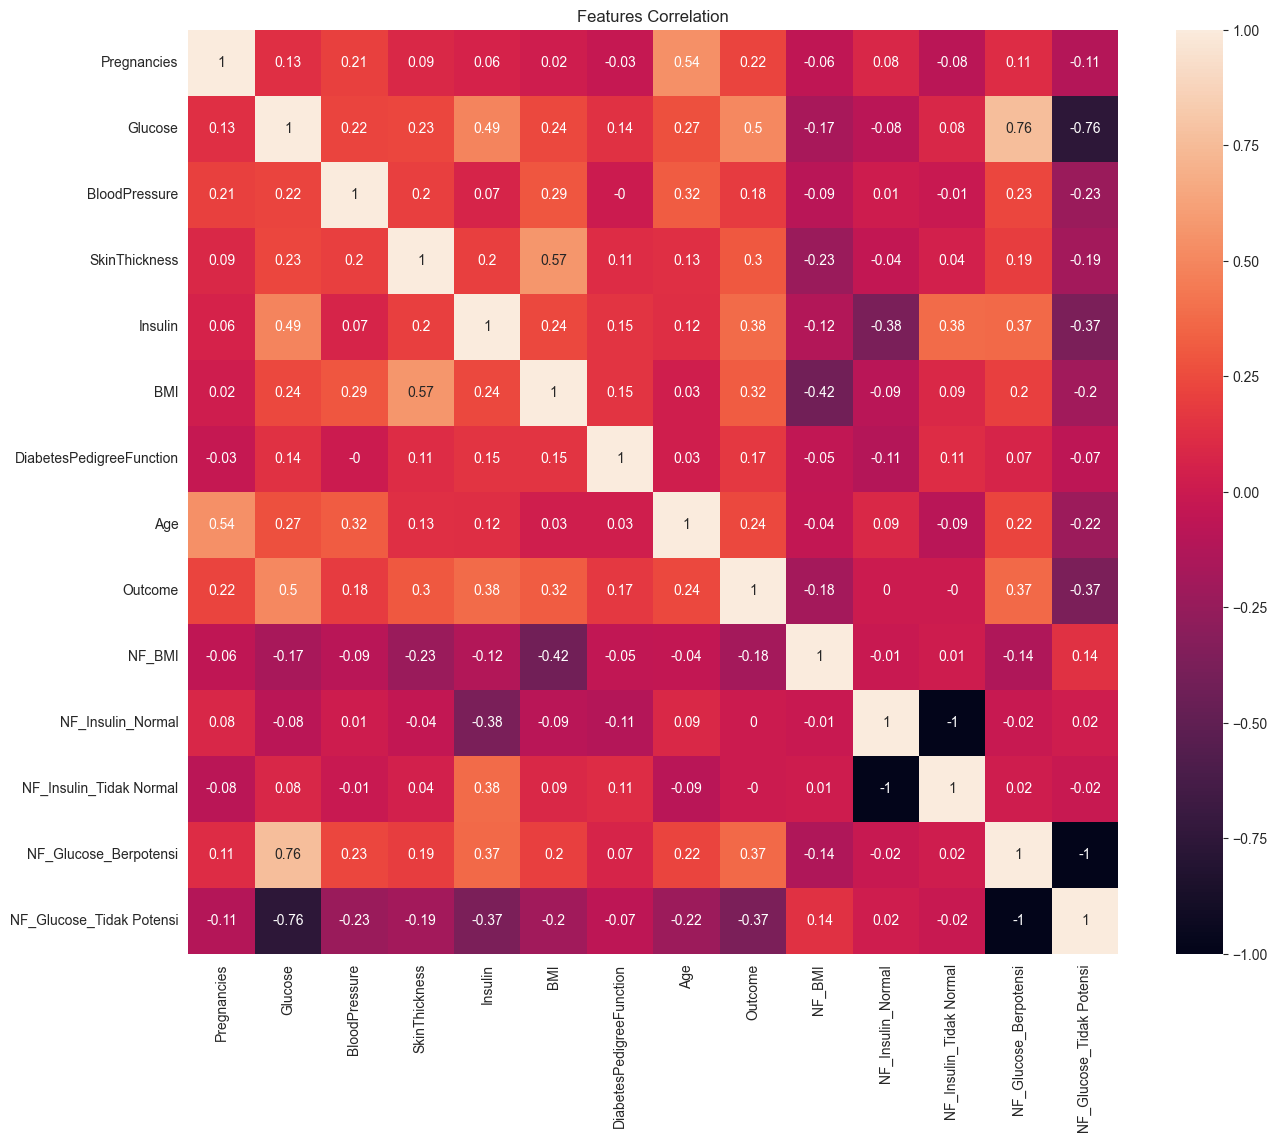

In [54]:
plt.figure(figsize=(15,12))
plot = sns.heatmap(data_prep.corr().round(2), annot=True)
plt.title('Features Correlation')

plt.show()

### Feature Scaling

Pakai robustscaler karena outlier nya tinggi banget (?)
will check again - gandhung

In [55]:
#from sklearn.preprocessing import RobustScaler
#rs = RobustScaler()
#rs.fit(data_prep)
#data_prep = pd.DataFrame(rs.transform(data_prep),
#                     columns=data_prep.columns)
#data_prep.head()

### Split Data

In [56]:
from sklearn.model_selection import train_test_split

x = data_prep.drop(columns=['Outcome']).copy()
y = data_prep['Outcome'].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 13)
(154, 13)
(614,)
(154,)


# Modeling

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [59]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Untuk setiap model yang akan digunakan, sebelumnya dilakukan Hyperparameter Tuning agar model yang digunakan bisa menghasilkan akurasi yang baik. Selain itu, untuk model yang cenderung overfitting seperti Random Forest dan Decision Tree dilakukan evaluasi overfitting.

## KNN

### Hyperparameter Tuning

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
k_range = range(1,10)
k_score = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, x, y, cv=20, scoring="accuracy")
  k_score.append(score.mean())

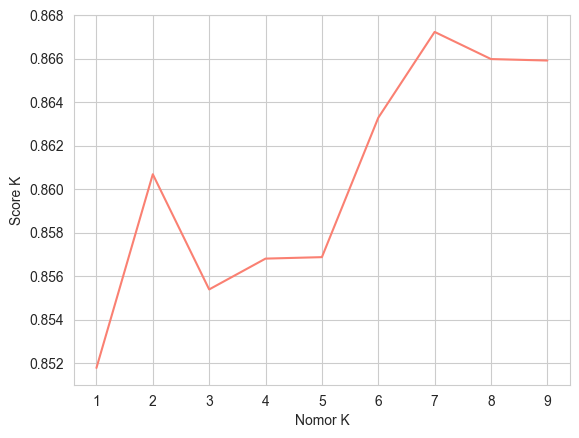

In [62]:
plt.plot(k_range, k_score, color = 'salmon')
plt.xlabel("Nomor K")
plt.ylabel("Score K")
plt.show()

In [63]:
#creating the hyperparameter gridp
param_grid = {'n_neighbors': np.arange(1, 10)}

#instantiating knn classifier
knn = KNeighborsClassifier()

#instantiating the GridSearchCV object
knn_cv = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy')

knn_cv.fit(x_train, y_train)

#print the tuned parameters and score
print("Tuned Support Vector Classifier Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

Tuned Support Vector Classifier Parameters: {'n_neighbors': 8}
Best score is 0.8543010752688172


Dari hasil parameter tuning di atas didapatkan k optimal yaitu 7 atau 8. Karena data berjumlah genap, maka sebaiknya menggunakan k yang bernilai ganjil.

In [64]:
#fit model KNN
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [65]:
#accuracy checking onn KNN model
print('Training Accuracy: ', metrics.accuracy_score(y_train, knn_model.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, knn_model.predict(x_test))*100)

Training Accuracy:  87.13355048859935
Test Accuracy:  89.6103896103896


Akurasi dari training cukup baik dan cenderung lebih baik di data test maka dapat dikatakan aman dari overfitting.

## SVC (Support Vector Classifier)

### Hyperparameter Tuning

In [66]:
#creating the hyperparameter grid
param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['rbf']}

#instantiating SVC classifier
svc = SVC(probability = True)

#instantiating the GridSearchCV object
svc_cv = GridSearchCV(svc, param_grid, refit = True, verbose = 3)

svc_cv.fit(x_train, y_train)

#print the tuned parameters and score
print("Tuned Support Vector Classifier Parameters: {}".format(svc_cv.best_params_))
print("Best score is {}".format(svc_cv.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.634 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [67]:
#fit Support Vector Classifier model
#rbf adalah default kernel untuk SVC
svc_model = SVC(C=10, gamma=0.0001, kernel = 'rbf', probability=True)
svc_model.fit(x_train, y_train)

SVC(C=10, gamma=0.0001, probability=True)

In [68]:
#accuracy checking on new SVC model
print('Training Accuracy: ', metrics.accuracy_score(y_train, svc_model.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, svc_model.predict(x_test))*100)

Training Accuracy:  89.90228013029315
Test Accuracy:  88.96103896103897


Dengan hyperparameter tuning didapatkan parameter optimal untuk model dan setelah model dilatih didapatkan skor akurasi yang baik. Selain itu, perbedaan antara akurasi training dan test sangat minim sehingga dapat dikatakan bahwa model aman dari overfitting.

## Random Forest

### Detect Overfitting

In [69]:
#Evaluate Overfitting
values = [i for i in range(1,16)]
train_scores = []
test_scores = []

In [70]:
#evaluate a random forest for each depth
for i in values:
	#configure the model
	rf = RandomForestClassifier(max_depth=i)
	#fit model on the training dataset
	rf.fit(x_train, y_train)
	#evaluate on the train dataset
	train_yhat = rf.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	#evaluate on the test dataset
	test_yhat = rf.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	#summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.827, test: 0.896
>2, train: 0.847, test: 0.870
>3, train: 0.891, test: 0.896
>4, train: 0.914, test: 0.909
>5, train: 0.930, test: 0.890
>6, train: 0.946, test: 0.896
>7, train: 0.972, test: 0.903
>8, train: 0.987, test: 0.883
>9, train: 0.993, test: 0.883
>10, train: 1.000, test: 0.896
>11, train: 1.000, test: 0.896
>12, train: 1.000, test: 0.909
>13, train: 1.000, test: 0.883
>14, train: 1.000, test: 0.909
>15, train: 1.000, test: 0.909


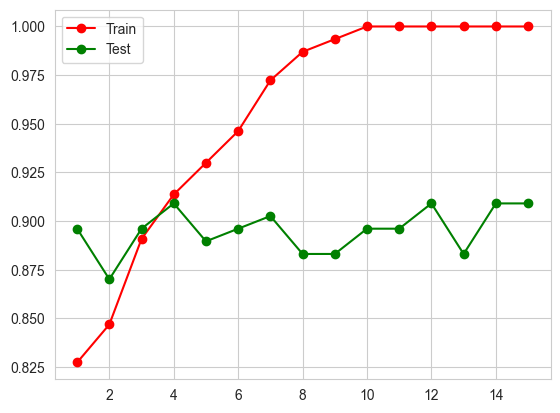

In [71]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train', color = 'red')
plt.plot(values, test_scores, '-o', label='Test', color = 'green')
plt.legend()
plt.show()

Dari hasil deteksi pada model, didapatkan bahwa model cenderung akan overfitting pada kedalaman > 4. Maka dari itu, pada model akan diterapkan max_depth = 4 agar mencegah overfitting.

### Hyperparameter Tuning

In [72]:
#creating the hyperparameter grid
#param_grid = {'max_features': ['auto', 'sqrt'],
#              'min_samples_leaf': np.arange(1, 11),
#              'min_samples_split': np.arange(2, 11),
#              'n_estimators': np.arange(100, 1001)}             

#instantiating Random Forest classifier
#rf = RandomForestClassifier()

#instantiating RandomizedSearchCV object
#rf_cv = RandomizedSearchCV(rf, param_grid, cv = 5)

#rf_cv.fit(x_train, y_train)

#print the tuned parameters and score
#print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
#print("Best score is {}".format(rf_cv.best_score_))

In [73]:
#fit Random Forest model
rf_model = RandomForestClassifier(max_depth = 4, max_features = 'sqrt', min_samples_leaf = 5, 
                                  min_samples_split = 9, n_estimators = 133, random_state = 1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=9,
                       n_estimators=133, random_state=1)

In [74]:
#accuracy checking on new Random Forest model
print('Training Accuracy: ', metrics.accuracy_score(y_train, rf_model.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, rf_model.predict(x_test))*100)

Training Accuracy:  91.20521172638436
Test Accuracy:  90.25974025974025


Skor akurasi yang dilakukan setelah melatih model dengan parameter-parameter optimal cukup baik dan karena perbedaan antara training dengan test tidak besar maka dapat dikatakan aman dari overfitting.

## Logistic Regression

### Hyperparameter Tuning

In [75]:
logreg=LogisticRegression()

logreg_parameter=[
   {'penalty' : ['l1', 'l2', 'elasticnet','none'],
   'C' : np.logspace(-4, 4, 20),
   'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
   'max_iter' : [10000]
   }
]

In [76]:
opt_logreg=GridSearchCV(logreg,param_grid=logreg_parameter,cv=4,verbose=True, n_jobs=-1)

In [77]:
best_logreg=opt_logreg.fit(x_train,y_train)

In [78]:
print('> The best parameter for Logistic Regression:{}\n'.format(best_logreg.best_params_))
print('> The score by using this parameter is:{}'.format(best_logreg.best_score_))

Menggunakan parameter paling optimal untuk melakukan training pada Logistic Regression

In [79]:
logreg_model=LogisticRegression(penalty='l1',
                                C=0.615848211066026,
                                max_iter=10000,
                                solver='liblinear')
logreg_model.fit(x_train,y_train)

LogisticRegression(C=0.615848211066026, max_iter=10000, penalty='l1',
                   solver='liblinear')

Melakukan prediksi dengan menggunakan train dan test data

In [80]:
print('Training Accuracy: ', metrics.accuracy_score(y_train, logreg_model.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, logreg_model.predict(x_test))*100)

Training Accuracy:  79.15309446254072
Test Accuracy:  82.46753246753246


## Decision Tree

### Detect Overfitting

In [81]:
#Evaluate Overfitting
values = [i for i in range(1,10)]
dt_train_scores = []
dt_test_scores = []

#Evaluate Decision Tree model's accuracy for each depth
for i in values:
  #Configure the model
	dt = DecisionTreeClassifier(max_depth=i)
	#Fit model on the training dataset
	dt.fit(x_train, y_train)
	#Evaluate on the train dataset
	dummy_train = dt.predict(x_train)
	train_acc = accuracy_score(y_train, dummy_train)
	dt_train_scores.append(train_acc)
	#Evaluate on the test dataset
	dummy_test = dt.predict(x_test)
	test_acc = accuracy_score(y_test, dummy_test)
	dt_test_scores.append(test_acc)
	#Summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.829, test: 0.851
>2, train: 0.849, test: 0.844
>3, train: 0.881, test: 0.870
>4, train: 0.897, test: 0.877
>5, train: 0.923, test: 0.864
>6, train: 0.950, test: 0.870
>7, train: 0.964, test: 0.877
>8, train: 0.980, test: 0.864
>9, train: 0.987, test: 0.857


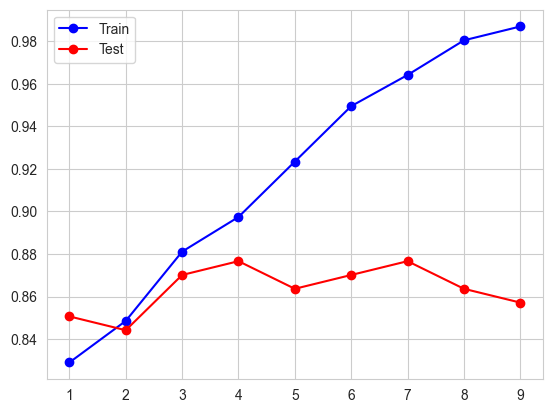

In [82]:
# plot of train and test scores vs tree depth
plt.plot(values, dt_train_scores, '-o', label='Train', color = 'blue')
plt.plot(values, dt_test_scores, '-o', label='Test', color = 'red')
plt.legend()
plt.show()

### Hyperparameter Tuning

In [83]:
x.columns.value_counts().sum()

In [84]:
dt=DecisionTreeClassifier()

dt_parameter=[
   {'criterion' : ['gini','entropy'],
   'max_depth' : np.arange(1,11),
   'min_samples_split' : np.arange(2,10),
   'min_samples_leaf' : np.arange(1,10),
   'max_features' : np.arange(1,17)
   }
]

In [85]:
opt_dt=GridSearchCV(dt,param_grid=dt_parameter,cv=10,verbose=True,n_jobs=-1)

In [86]:
best_dt=opt_dt.fit(x_train,y_train)

In [87]:
print('> The best parameter for Decision Tree:{}\n'.format(best_dt.best_params_))
print('> The score by using this parameter is:{}'.format(best_dt.best_score_))

Menggunakan parameter paling optimal untuk melakukan training pada Decision Tree

In [88]:
dt_model=DecisionTreeClassifier(criterion='gini',
                                max_depth=9,
                                max_features=7,
                                min_samples_leaf=9,
                                min_samples_split=2)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features=7, min_samples_leaf=9)

In [89]:
print('Training Accuracy: ', metrics.accuracy_score(y_train, dt_model.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, dt_model.predict(x_test))*100)

Training Accuracy:  91.04234527687296
Test Accuracy:  89.6103896103896


# Evaluasi Model

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

## KNN

In [91]:
print('KNN')
y_pred = knn_model.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = knn_model.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

KNN
Accuracy: 0.90
Precision: 0.82
Recall: 0.85
F1-Score: 0.83
ROC-AUC: 0.92


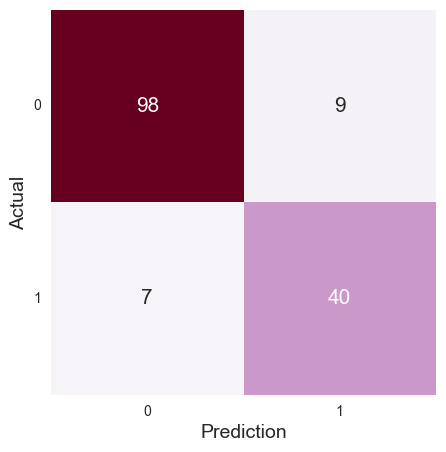

In [92]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## SVC (Support Vector Classifier)

In [93]:
print('SVC')
y_pred = svc_model.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = svc_model.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

SVC
Accuracy: 0.89
Precision: 0.79
Recall: 0.87
F1-Score: 0.83
ROC-AUC: 0.93


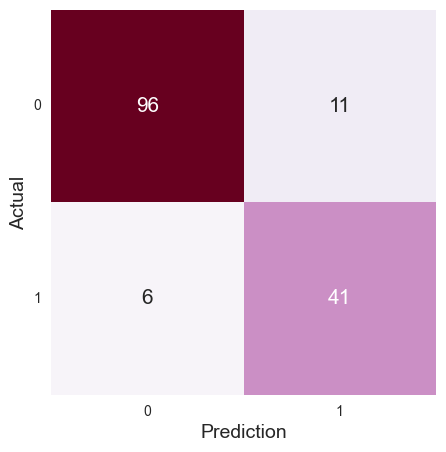

In [94]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## Random Forest

In [95]:
print('Random Forest')
y_pred = rf_model.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = rf_model.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

Random Forest
Accuracy: 0.90
Precision: 0.80
Recall: 0.91
F1-Score: 0.85
ROC-AUC: 0.97


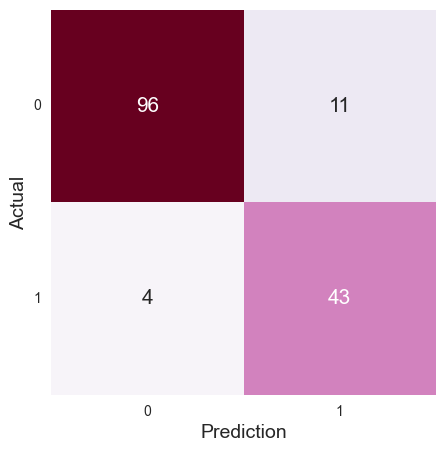

In [96]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## Logistic Regression

In [97]:
print('Logistic Regression')
y_pred = logreg_model.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = logreg_model.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

Logistic Regression
Accuracy: 0.82
Precision: 0.72
Recall: 0.70
F1-Score: 0.71
ROC-AUC: 0.91


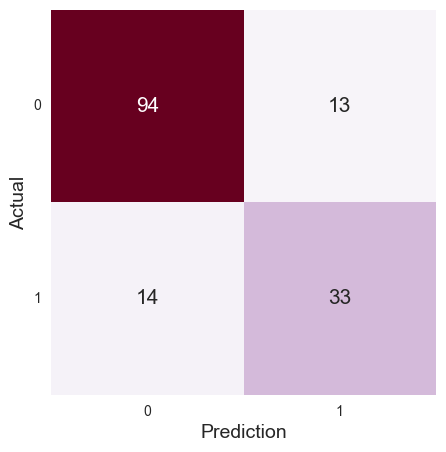

In [98]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## Decision Tree

In [99]:
print('Decision Tree')
y_pred = dt_model.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = dt_model.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

Decision Tree
Accuracy: 0.90
Precision: 0.83
Recall: 0.83
F1-Score: 0.83
ROC-AUC: 0.95


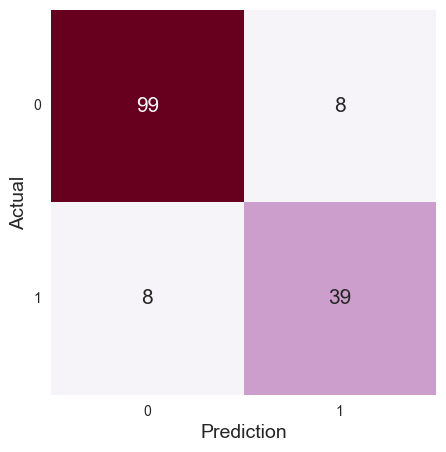

In [100]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

# Resampling

In [101]:
round(y_train.value_counts()/len(y_train)*100,2)

0    64.01
1    35.99
Name: Outcome, dtype: float64

In [104]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)
print(y_smote.value_counts())

1    393
0    393
Name: Outcome, dtype: int64


## KNN Resampled

In [105]:
#fit model KNN
knn_model_r = KNeighborsClassifier(n_neighbors=7)
knn_model_r.fit(x_smote, y_smote)

KNeighborsClassifier(n_neighbors=7)

In [106]:
print('Training Accuracy: ', metrics.accuracy_score(y_train, knn_model_r.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, knn_model_r.predict(x_test))*100)

Training Accuracy:  86.97068403908796
Test Accuracy:  86.36363636363636


In [107]:
print('KNN')
y_pred = knn_model_r.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = knn_model_r.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

KNN
Accuracy: 0.86
Precision: 0.73
Recall: 0.87
F1-Score: 0.80
ROC-AUC: 0.93


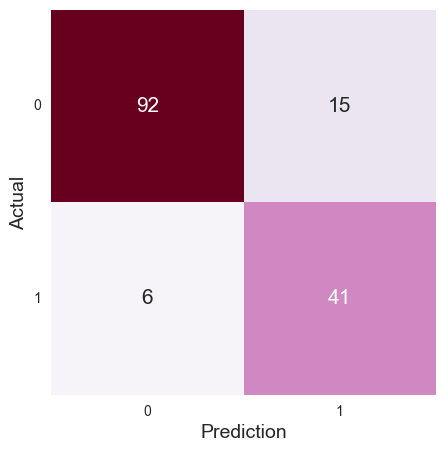

In [108]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## SVC Resampled

In [109]:
svc_model_r = SVC(C=10, gamma=0.0001, probability=True)
svc_model_r.fit(x_smote, y_smote)

SVC(C=10, gamma=0.0001, probability=True)

In [110]:
print('Training Accuracy: ', metrics.accuracy_score(y_train, svc_model_r.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, svc_model_r.predict(x_test))*100)

Training Accuracy:  88.11074918566774
Test Accuracy:  88.96103896103897


In [111]:
print('SVC')
y_pred = svc_model_r.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = svc_model_r.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

SVC
Accuracy: 0.89
Precision: 0.78
Recall: 0.89
F1-Score: 0.83
ROC-AUC: 0.94


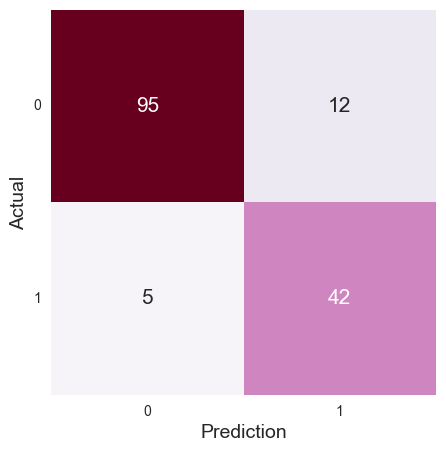

In [112]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## Random Forest Resampled

In [113]:
#fit Random Forest model
rf_model_r = RandomForestClassifier(max_depth = 4, max_features = 'auto', min_samples_leaf = 1, 
                                  min_samples_split = 8, n_estimators = 241, random_state = 1)
rf_model_r.fit(x_smote, y_smote)

c:\Users\prase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=4, max_features='auto', min_samples_split=8,
                       n_estimators=241, random_state=1)

In [114]:
#accuracy checking on new Random Forest model
print('Training Accuracy: ', metrics.accuracy_score(y_train, rf_model_r.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, rf_model_r.predict(x_test))*100)

Training Accuracy:  88.43648208469055
Test Accuracy:  86.36363636363636


In [115]:
print('Random Forest')
y_pred = rf_model_r.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = rf_model_r.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

Random Forest
Accuracy: 0.86
Precision: 0.72
Recall: 0.91
F1-Score: 0.80
ROC-AUC: 0.95


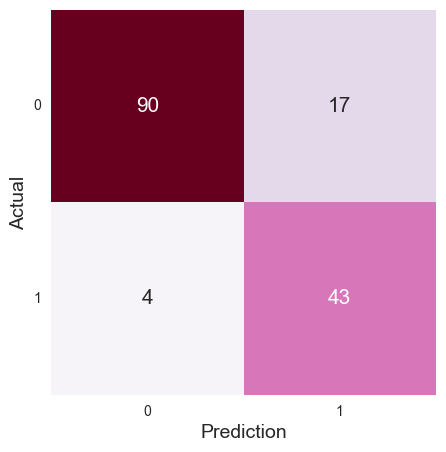

In [116]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## Logistic Regression Resampled

In [117]:
logreg_model_r=LogisticRegression(penalty='l1',C=0.615848211066026,max_iter=10000,solver='liblinear')
logreg_model_r.fit(x_smote,y_smote)

LogisticRegression(C=0.615848211066026, max_iter=10000, penalty='l1',
                   solver='liblinear')

In [118]:
print('Training Accuracy: ', metrics.accuracy_score(y_train, logreg_model_r.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, logreg_model_r.predict(x_test))*100)

Training Accuracy:  81.10749185667753
Test Accuracy:  83.11688311688312


In [119]:
print('Logistic Regression')
y_pred = logreg_model_r.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = logreg_model_r.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

Logistic Regression
Accuracy: 0.83
Precision: 0.66
Recall: 0.94
F1-Score: 0.77
ROC-AUC: 0.92


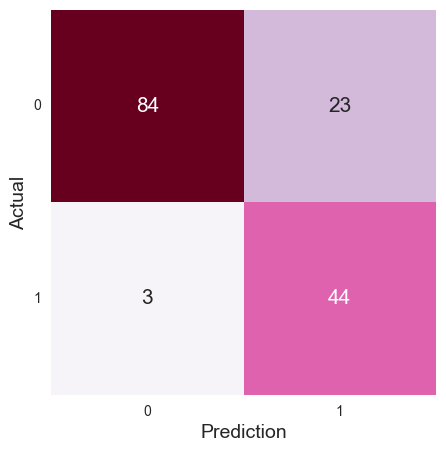

In [120]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## Decision Tree Resampled

In [121]:
dt_model_r=DecisionTreeClassifier(criterion='gini',max_depth=9,max_features=7,min_samples_leaf=9,min_samples_split=2)
dt_model_r.fit(x_smote,y_smote)

DecisionTreeClassifier(max_depth=9, max_features=7, min_samples_leaf=9)

In [122]:
print('Training Accuracy: ', metrics.accuracy_score(y_train, dt_model_r.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, dt_model_r.predict(x_test))*100)

Training Accuracy:  88.11074918566774
Test Accuracy:  85.06493506493507


In [123]:
print('Decision Tree')
y_pred = dt_model_r.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = dt_model_r.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

Decision Tree
Accuracy: 0.85
Precision: 0.71
Recall: 0.85
F1-Score: 0.78
ROC-AUC: 0.93


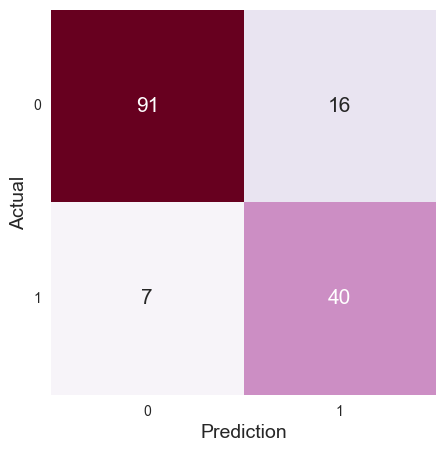

In [124]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

Setelah melakukan resampling, dapat dilihat bahwa tidak ada perbedaan score yang signifikan. Justru, mayoritas model mengalami penurunan akurasi. Oleh karena itu, metode resampling tidak digunakan

# Feature Importance

Merupakan fungsi untuk melihat seberapa penting suatu fitur berperan dalam modeling klasifikasi. Sehingga dapat dieliminasi fitur yang kurang berperan penting saat melakukan re-modeling untuk selanjutnya di-deploy.

In [125]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'NF_BMI', 'NF_Insulin_Normal',
       'NF_Insulin_Tidak Normal', 'NF_Glucose_Berpotensi',
       'NF_Glucose_Tidak Potensi'],
      dtype='object')

In [126]:
rf_model.feature_importances_

array([0.02327792, 0.14958731, 0.01436435, 0.11389383, 0.45236943,
       0.05334406, 0.02407009, 0.06578169, 0.01276577, 0.00815188,
       0.00955795, 0.03452124, 0.03831448])

In [127]:
data_fi = pd.DataFrame(zip(x_train.columns, rf_model.feature_importances_),
                       columns = ['Feature', 'Importance'])
data_fi.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
4,Insulin,0.452369
1,Glucose,0.149587
3,SkinThickness,0.113894
7,Age,0.065782
5,BMI,0.053344
12,NF_Glucose_Tidak Potensi,0.038314
11,NF_Glucose_Berpotensi,0.034521
6,DiabetesPedigreeFunction,0.024070
0,Pregnancies,0.023278
2,BloodPressure,0.014364


Dari hasil Feature Importance didapatkan tingakatan fitur seberapa berpengaruh terhadap hasil prediksi. Apabila melakukan re-modeling, fitur dengan tingkat pengaruh yang kecil dapat dihapus agar model lebih akurat.

# Re-modeling

Melakukan re-modeling dengan fitur-fitur yang berpengaruh kuat terhadap prediksi berdasarkan hasil feature importance.

In [128]:
data_prep.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NF_BMI',
       'NF_Insulin_Normal', 'NF_Insulin_Tidak Normal', 'NF_Glucose_Berpotensi',
       'NF_Glucose_Tidak Potensi'],
      dtype='object')

In [129]:
#menghapus fitur yang memiliki pengaruh kecil terhadap prediksi
df = data_prep.copy()
df = df.drop(columns = ['NF_BMI', 'NF_Insulin_Normal', 'NF_Insulin_Tidak Normal'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NF_Glucose_Berpotensi,NF_Glucose_Tidak Potensi
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1.0,0.0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0.0,1.0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1.0,0.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0.0,1.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1.0,0.0


In [130]:
#masukan prediktor ke x dan label ke y
x1 = df.drop(columns=['Outcome']).copy()
y1 = df['Outcome'].copy()

In [131]:
#split data
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.20, random_state = 0)

In [132]:
#Evaluate Overfitting
values = [i for i in range(1,16)]
train_scores = []
test_scores = []

In [133]:
#evaluate a random forest for each depth
for i in values:
	#configure the model
	rf_r = RandomForestClassifier(max_depth=i)
	#fit model on the training dataset
	rf_r.fit(x1_train, y1_train)
	#evaluate on the train dataset
	train_yhat = rf_r.predict(x1_train)
	train_acc = accuracy_score(y1_train, train_yhat)
	train_scores.append(train_acc)
	#evaluate on the test dataset
	test_yhat = rf_r.predict(x1_test)
	test_acc = accuracy_score(y1_test, test_yhat)
	test_scores.append(test_acc)
	#summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.834, test: 0.877
>2, train: 0.878, test: 0.903
>3, train: 0.901, test: 0.896
>4, train: 0.907, test: 0.890
>5, train: 0.943, test: 0.896
>6, train: 0.954, test: 0.890
>7, train: 0.980, test: 0.896
>8, train: 0.992, test: 0.877
>9, train: 0.995, test: 0.896
>10, train: 1.000, test: 0.890
>11, train: 1.000, test: 0.870
>12, train: 1.000, test: 0.877
>13, train: 1.000, test: 0.877
>14, train: 1.000, test: 0.883
>15, train: 1.000, test: 0.883


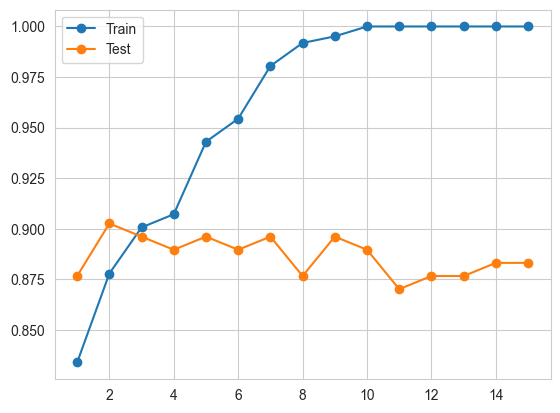

In [134]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [ ]:
#creating the hyperparameter grid
random_grid = {'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'n_estimators': np.arange(100, 1001)}             

#instantiating Random Forest classifier
rf_r = RandomForestClassifier()

#instantiating RandomizedSearchCV object
rf_r_cv = RandomizedSearchCV(rf_r, random_grid, cv = 5, random_state = 1)

rf_r_cv.fit(x1_train, y1_train)

#print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_r_cv.best_params_))
print("Best score is {}".format(rf_r_cv.best_score_))

In [136]:
#fit model Random Forest
rf_remodel = RandomForestClassifier(max_depth = 4, max_features = 'auto', min_samples_leaf = 1, 
                                  min_samples_split = 7, n_estimators = 787, random_state = 1)
rf_remodel.fit(x1_train, y1_train)

c:\Users\prase\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=4, max_features='auto', min_samples_split=7,
                       n_estimators=787, random_state=1)

In [137]:
#cek akurasi
print('Training Accuracy: ', metrics.accuracy_score(y1_train, rf_remodel.predict(x1_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y1_test, rf_remodel.predict(x1_test))*100)

Training Accuracy:  91.04234527687296
Test Accuracy:  90.25974025974025


In [138]:
#evaluasi model
print('Random Forest')
y1_pred = rf_remodel.predict(x1_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y1_test, y1_pred)))
print('Precision: {:.2f}'.format(precision_score(y1_test, y1_pred)))
print('Recall: {:.2f}'.format(recall_score(y1_test, y1_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y1_test, y1_pred)))

y1_pred_proba = rf_remodel.predict_proba(x1_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y1_test, y1_pred_proba)))

Random Forest
Accuracy: 0.90
Precision: 0.80
Recall: 0.91
F1-Score: 0.85
ROC-AUC: 0.97


Setelah dilakukan re-modeling dengan fitur terkuat, performa model justru menurun. Sehingga, untuk model yang digunakan adalah model dengan algoritma awal Random Forest tanpa resampling dan tanpa menghapus fitur apapun dari dataset.

# Saving Model For Deployment

In [139]:
import pickle

In [140]:
pickle.dump(rf_model, open('Diabetes_pred_rf.pkl', 'wb'))